In [2]:
# Dropping pitcher_id as an improvement. Would drop more given more time.
df = pd.read_csv('modeling_round2.csv')
df = df.drop(['Unnamed: 0', 'pitcher_id'], axis=1)

In [5]:
rfc = RandomForestClassifier(random_state=12)
ridge = RidgeClassifier(random_state=12)

In [6]:
get_metrics(rfc, df_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)
Accuracy: 0.458205522364
F1 Macro: 0.385150027065
F1 Micro: 0.458205522364
F1 Weighted: 0.442751631981
             precision    recall  f1-score   support

         CH       0.27      0.22      0.25     43569
         CU       0.29      0.24      0.26     33759
         EP       0.08      0.01      0.02        84
         FA       0.51      0.64      0.57    143423
         FC       0.42      0.35      0.38     24964
         FS       0.34      0.22      0.26      6297
         FT       0.43      0.39      0.41     48718
         IN       0.95      0.69      0.80      2417
         KC 

In [7]:
get_metrics(ridge, df_train)

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=12, solver='auto',
        tol=0.001)
Accuracy: 0.482940578655
F1 Macro: 0.325988761639
F1 Micro: 0.482940578655
F1 Weighted: 0.421518378768
             precision    recall  f1-score   support

         CH       0.34      0.06      0.10     43569
         CU       0.40      0.07      0.12     33759
         EP       0.00      0.00      0.00        84
         FA       0.49      0.79      0.60    143423
         FC       0.48      0.31      0.38     24964
         FS       0.38      0.06      0.11      6297
         FT       0.43      0.42      0.42     48718
         IN       1.00      0.70      0.82      2417
         KC       0.47      0.07      0.13      5123
         KN       0.80      1.00      0.89      2666
         PO       0.00      0.00      0.00       539
         SC       0.31      0.05      0.09        73
         SI       0.52      0.84     

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


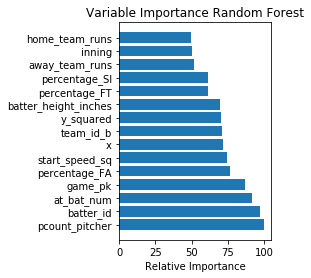

In [8]:
rfc.fit(X_train, Y_train)
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Random Forest')
plt.show()

Again very slight improvements to round 2. If I were to do more modeling rounds I would keep reducing features. Some ideas I have to drop are previous_event and I can get rid of about 15 features there. It seems like none of the previous features I created added any value, so maybe I can toss almost all of them.

In [9]:
df.to_csv('modeling_round3.csv', index=False)